<a href="https://colab.research.google.com/github/rahul0425/IE_mask_detection/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras import layers,models

In [2]:
uploaded= files.upload()

Saving data.zip to data.zip


In [3]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


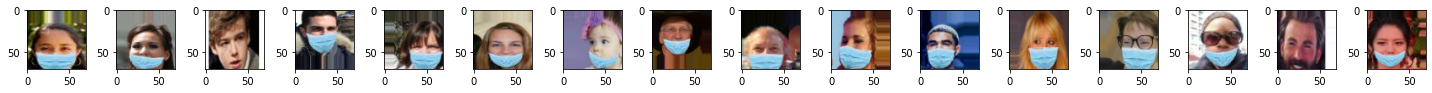

[0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]


In [4]:
directory='data'
train_data= ImageDataGenerator(validation_split=0.2, rescale=1./255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.2
                               )
train= train_data.flow_from_directory(directory,
                                      target_size=(70,70),
                                      batch_size=16,
                                      color_mode='rgb',
                                      class_mode='binary',
                                      seed=2020,
                                      subset='training'
                                      )
test=train_data.flow_from_directory(directory,
                                      target_size=(70,70),
                                      batch_size=16,
                                      color_mode='rgb',
                                      class_mode='binary',
                                      subset='validation')
img,labels= next(train)

def plotImages(images_arr):
  fig,axes= plt.subplots(1,16,figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


plotImages(img)
print(labels)


In [15]:
def get_model():
  model=models.Sequential()
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=[70,70,3],padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))
  
  #model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
  model.add(layers.MaxPool2D(pool_size=(2,2),strides=2))

  #model.add(layers.BatchNormalization())

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))

  model.summary()

  return model


In [16]:
classifier= get_model()
classifier.compile(optimizer ='adam', loss='binary_crossentropy',metrics=['accuracy'])

history= classifier.fit(train, epochs=30, validation_data=test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)             

In [23]:
up=files.upload()

Saving 15s.png to 15s (1).png
Saving 16s.png to 16s.png


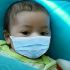



with mask


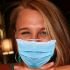



with mask


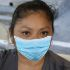



with mask


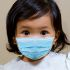



with mask


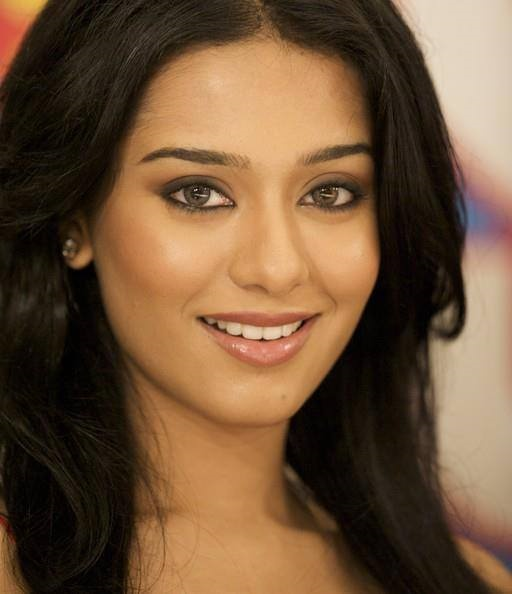



without mask


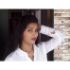



without mask


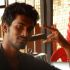



without mask


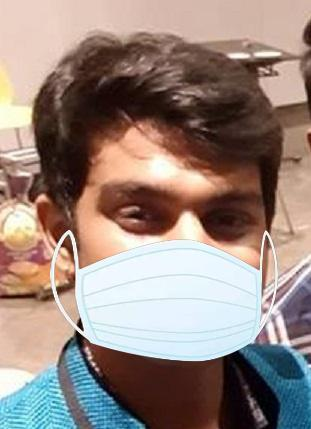



without mask


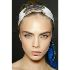



without mask


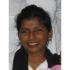



without mask


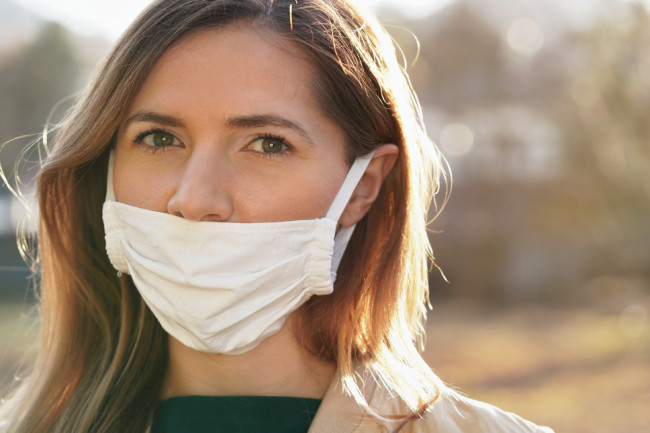



without mask


In [27]:
from IPython.display import Image,display
from keras.preprocessing import image        
import numpy as np
for i in range(1,12):
  img_directory= str(i)+'s.jpg'
  img_pred=image.load_img(img_directory,target_size=(70,70))
  img_pred=image.img_to_array(img_pred)
  img_pred=np.expand_dims(img_pred,axis=0)

  prediction=classifier.predict(img_pred)
  display(Image(img_directory,width=150,height=150))
  print('\n')
  if(int(prediction[0][0])==0):
    print("with mask")
  else:
    print("without mask")